# Домашнее задание 02. Бостонская недвижимость.

In [7]:
import pandas as pd
from sklearn.datasets import load_boston
import seaborn as sns
from matplotlib import pyplot as plt

import numpy as np
import seaborn as sns

%matplotlib inline

## Шаг 01. Загрузка данных.

In [8]:
# Загрузка данных по основному варианту
data = pd.read_csv(load_boston()['filename'], skiprows=1)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [9]:
# Данный подход не всегда работает, поэтому загружаем через другой подход: датасет без заголовков с прикреплением потом.
boston = load_boston() 
data_2 = pd.DataFrame(data= np.c_[boston['data'], boston['target']]) # Загружаем отдельно данные и таргет
data_2.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD','TAX', 'PTRATIO', 'B', 'LSTAT','MEDV']
data_2.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Шаг 02. Описываем датасет.

In [12]:
import pandas_profiling
profile = pandas_profiling.ProfileReport(data)

In [13]:
profile.to_file(output_file="PandasProfiling.html")

In [15]:
# pandas_profiling.ProfileReport(data)

In [17]:
data_2.describe(include='all')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [19]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(14)
memory usage: 55.5 KB


In [23]:
# Проверим кол-во нулевых значений по всем параметрам. Нулевые отсутствуют.
data_2.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

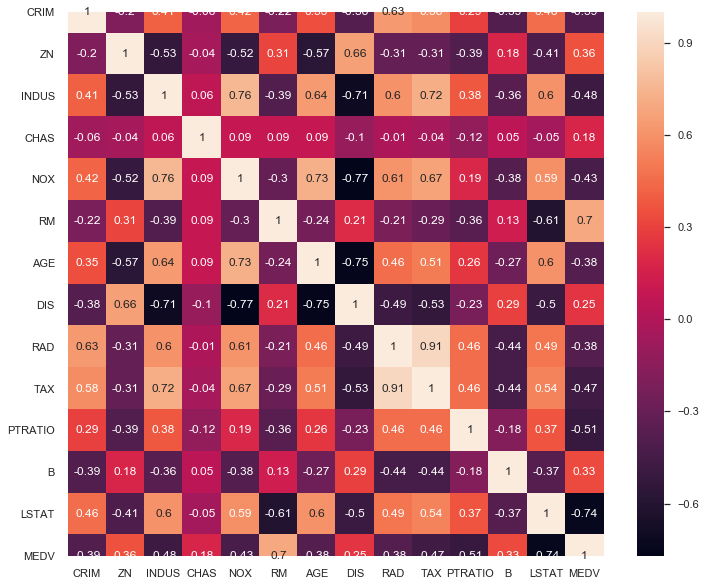

In [37]:
correlation_matrix = data_2.corr().round(2)
# annot = True to print the values inside the square
fig, ax = plt.subplots(figsize=(12,10)) 
sns.heatmap(data=correlation_matrix, annot=True)

Данный датасет представляет собой описание объектов недвижимости в Бостоне:
- **CRIM**: Уровень преступности на душу населения.
- **ZN**: Доля крупных участков, площадью 25 000 кв. футов. 
- **INDUS**: Доля неторговых помещений
- **CHAS**: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- **NOX**: Концентрация оксидов азота NOX (parts per 10 million)        
- **RM**: Среднее кол-во комнат (average number of rooms per dwelling)
- **AGE**: Доля заселенных домов, построенных до 1940
- **DIS**: Взвешенные расстояния до пяти бостонских центров занятости    
- **RAD**: Индекс доступности к радиальным магистралям
- **TAX**: Размер налогов на имущество (full-value property-tax rate per 10 000)
- **PTRATIO**: Соотношение учеников и учителей по городам
- **B**: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town. Похоже, доля чернокожих.
- **LSTAT**: Возможно доля необеспеченного населения (% lower status of the population)
- **MEDV**: Медианная стоимость заселенных домов в тыс. долларов. Это наш таргет.

Сформулируем первичные предположения:
* Пропуски и нулевые значения отсутствуют  
* Все показатели - числовые, категориальных нет (предварительно)

Положительное влияние оказывают CHAS, RM, RAD, PTRATIO  
Негативное влияние: CRIM, NOX, AGE, DIS, TAX, LSTAT  

1. Сильная обратная корреляция **LSTAT** к целевой метрике  
2. Сильная положительная корреляция **RM** к целевой метрике 
3. Сильная положительная корреляция **RAD - TAX**
4. Сильная корреляция **DIS** и **INDUS/NOX/AGE** *(не ниже -0,7)*

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

X_train, X_test, Y_train, Y_test = train_test_split(data_2[['LSTAT', 'RM']], data_2['MEDV'], test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

model = LinearRegression()
model.fit(X_train, Y_train)

X_2 = data_2[['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']]
y_2 = data_2['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X_2, y_2, test_size=0.3, random_state=1)
estimator = LinearRegression()
estimator.fit(X_train, y_train)
y_pred = estimator.predict(X_test)

print(f'Коэффициент детерминации (R2): {r2_score(y_test, y_pred)}')
print(f'Среднеквадратичная ошибка (RMSE): {np.sqrt(mean_squared_error(y_test, y_pred))}')
print(f'Среднее абсолютной ошибки (MAE): {mean_absolute_error(y_test, y_pred)}')

(404, 2)
(102, 2)
(404,)
(102,)
Коэффициент детерминации (R2): 0.7836295385076281
Среднеквадратичная ошибка (RMSE): 4.45323743719816
Среднее абсолютной ошибки (MAE): 3.3446655035987476


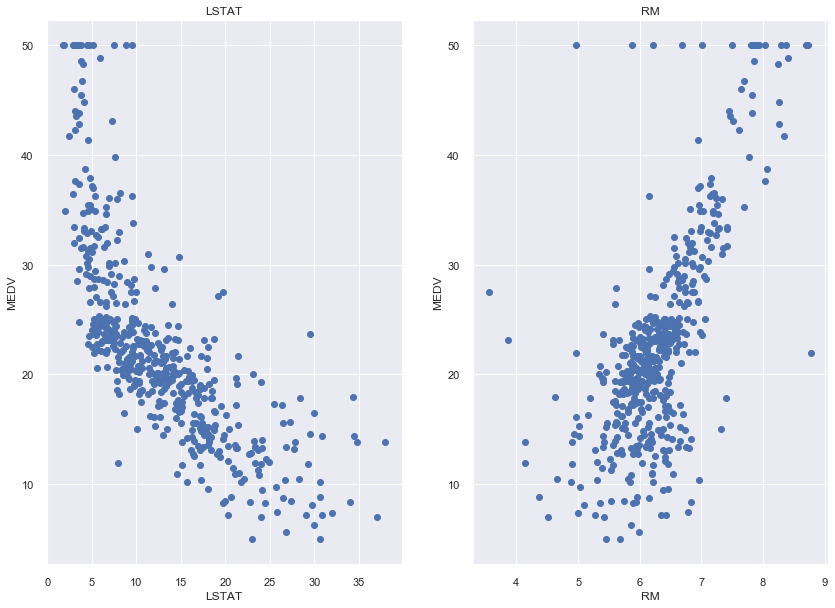

In [53]:
features = ['LSTAT', 'RM']
target = data_2['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = data_2[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')